# <center>Iris Species Classification</center>
<div style="width:100%;text-align: center;"> <img align = middle src="https://hellor.netlify.app/slides/iris_flower_dataset.png" style="height:300px;"> </div>

In [47]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graphviz
import seaborn as sns
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# I. Data presentation

In [3]:
df = pd.read_csv('../data/iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())

print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


In [8]:
df.drop(columns=['Id'], axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# II. Exploratory Data Analysis

In [9]:
print("The different Species in the dataset are:", df['Species'].unique())
print("The total number of unique species are:", df['Species'].nunique())

The different Species in the dataset are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The total number of unique species are: 3


In [11]:
print("The distribution of the classes is:\n", df['Species'].value_counts(), sep = "")

The distribution of the classes is:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## II.1  Univariate Analysis

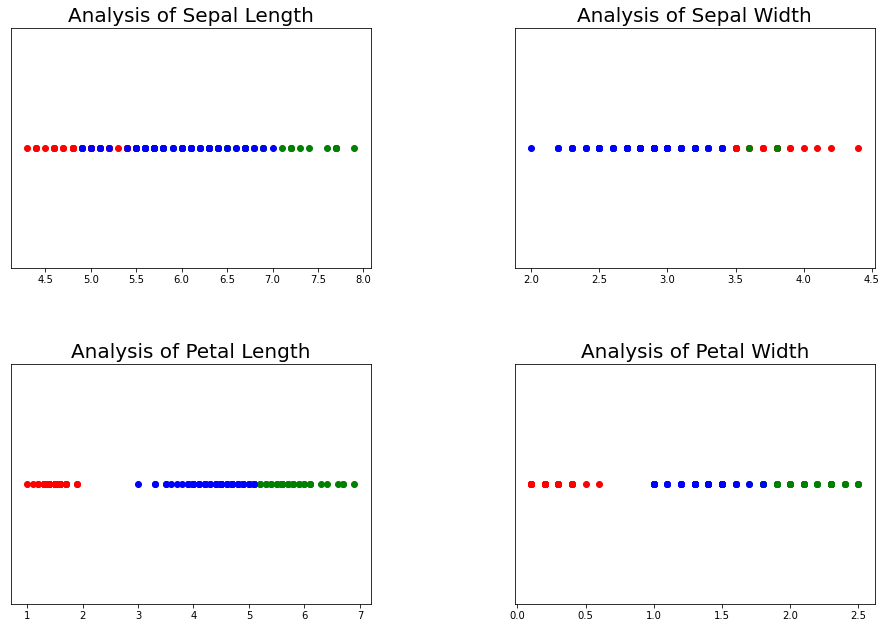

In [12]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot((df[df['Species'] == 'Iris-setosa'])['SepalLengthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-setosa'])['SepalLengthCm']), 'ro')
ax1.plot((df[df['Species'] == 'Iris-virginica'])['SepalLengthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-virginica'])['SepalLengthCm']), 'go')
ax1.plot((df[df['Species'] == 'Iris-versicolor'])['SepalLengthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['SepalLengthCm']), 'bo')
ax1.set_title('Analysis of Sepal Length', size=20)
ax1.get_yaxis().set_visible(False)

ax2.plot((df[df['Species'] == 'Iris-setosa'])['SepalWidthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-setosa'])['SepalWidthCm']), 'ro')
ax2.plot((df[df['Species'] == 'Iris-virginica'])['SepalWidthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-virginica'])['SepalWidthCm']), 'go')
ax2.plot((df[df['Species'] == 'Iris-versicolor'])['SepalWidthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['SepalWidthCm']), 'bo')
ax2.set_title('Analysis of Sepal Width', size=20)
ax2.get_yaxis().set_visible(False)

ax3.plot((df[df['Species'] == 'Iris-setosa'])['PetalLengthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-setosa'])['PetalLengthCm']), 'ro')
ax3.plot((df[df['Species'] == 'Iris-virginica'])['PetalLengthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-virginica'])['PetalLengthCm']), 'go')
ax3.plot((df[df['Species'] == 'Iris-versicolor'])['PetalLengthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['PetalLengthCm']), 'bo')
ax3.set_title('Analysis of Petal Length', size=20)
ax3.get_yaxis().set_visible(False)

ax4.plot((df[df['Species'] == 'Iris-setosa'])['PetalWidthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-setosa'])['PetalWidthCm']), 'ro')
ax4.plot((df[df['Species'] == 'Iris-virginica'])['PetalWidthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-virginica'])['PetalWidthCm']), 'go')
ax4.plot((df[df['Species'] == 'Iris-versicolor'])['PetalWidthCm'],
         np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['PetalWidthCm']), 'bo')
ax4.set_title('Analysis of Petal Width', size=20)
ax4.get_yaxis().set_visible(False)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

**Observations**:
 - `SepalLengthCm`: Iris-setosa has the smallest sepal length. We can see an outlier (red dot) in the graph. Iris-versicolor has a sepal length of about 5 cm to 7 cm. Iris-virginica has the largest sepal length (above 7 cm).
 - `SepalWidthCm`: Iris-versicolor has the smallest sepal width. The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.
 - `PetalLengthCm`: Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. Iris-virginica has the largest petal length (5 cm or greater).
 - `PetalWidthCm`: Iris-setosa has the smallest petal width. Iris-versicolor has a petal length from 1 cm to slightly less than 2 cm. Iris-virginica has a petal width that is approximately greater than 1.8 cm.

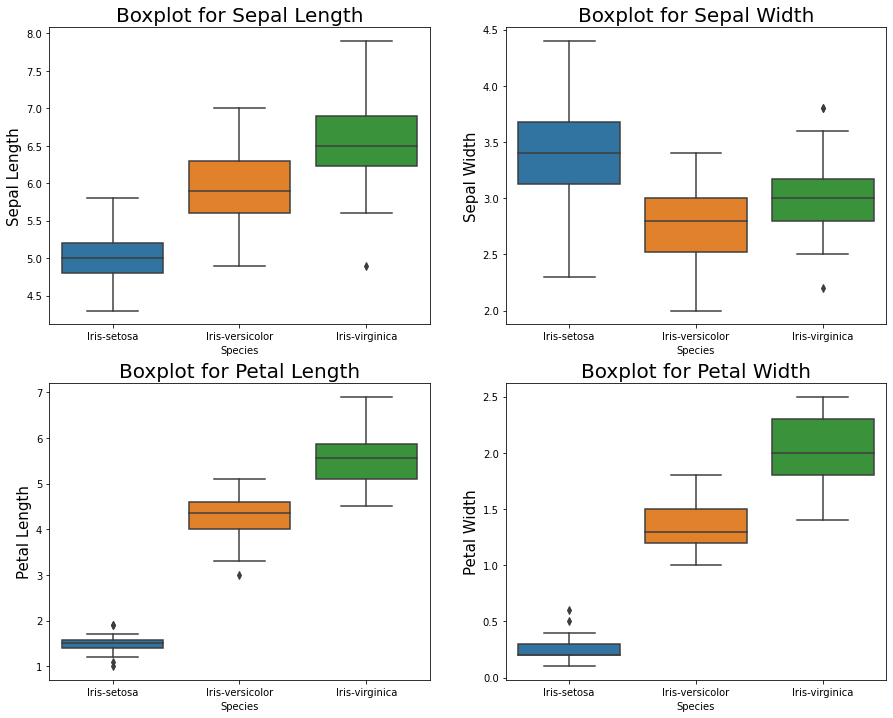

In [16]:
plt.figure(figsize=(15, 12))


def create_boxplot(feature):
    sns.boxplot(data=df, x='Species', y=feature)
    if (feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if (feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if (feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if (feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize=20)
    plt.ylabel(feature, fontsize=15)


plt.subplot(221)
create_boxplot('SepalLengthCm')

plt.subplot(222)
create_boxplot('SepalWidthCm')

plt.subplot(223)
create_boxplot('PetalLengthCm')

plt.subplot(224)
create_boxplot('PetalWidthCm')

plt.show()

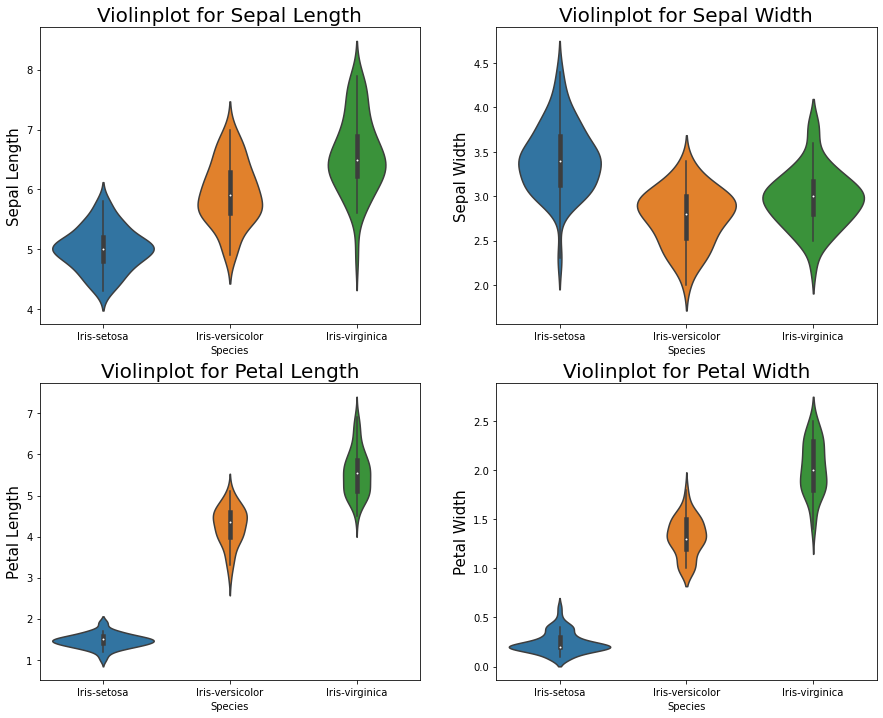

In [19]:
plt.figure(figsize=(15, 12))


def create_violinplot(feature):
    sns.violinplot(data=df, x='Species', y=feature)
    if (feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if (feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if (feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if (feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Violinplot for ' + feature, fontsize=20)
    plt.ylabel(feature, fontsize=15)


plt.subplot(221)
create_violinplot('SepalLengthCm')

plt.subplot(222)
create_violinplot('SepalWidthCm')

plt.subplot(223)
create_violinplot('PetalLengthCm')

plt.subplot(224)
create_violinplot('PetalWidthCm')

plt.show()

**Observations**:
In terms of the median the observations from the violin-plot are similar to that of the box-plot.
 - `SepalLengthCm`: There is a high probability that Iris-setosa will have a sepal length of 5 cm.
 - `SepalWidthCm`: For Iris-versicolor and Iris-virginica there is a high probability that they will have approximately the same sepal width. Thus identification of the species based on this feature only might not yield good results.
 - `PetalLengthCm`: Most of petal lengths for Iris-setosa are about 1.5 cm.
 - `PetalWidthCm`: There is a high probability that the petal width for Iris-setosa species would be approximately 0.25 cm. The violin plots for Iris-versicolor and Iris-virginica are not as broad as that of Iris-setosa.

## II.2 Bivariate Analysis
Bivariate analysis is a form of statistical analysis. It involves the analysis of two variables for the purpose of determining the relationship between them.

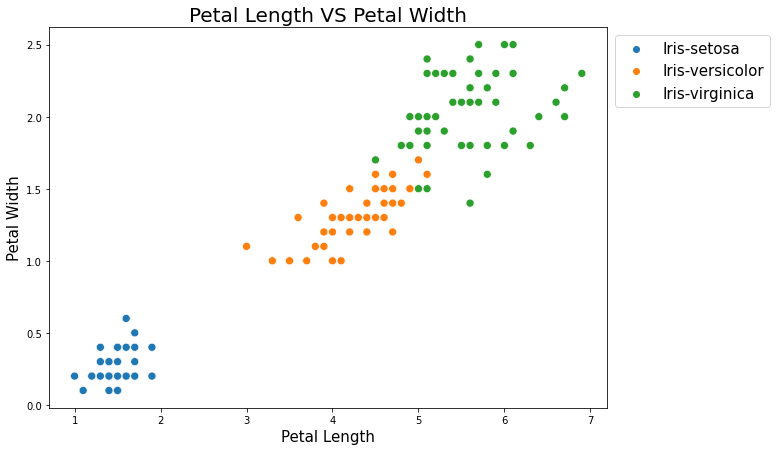

In [20]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, s=65)
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=15)
plt.title('Petal Length VS Petal Width', fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)
plt.show()

We can see that the petal length and petal width is the least for Iris-setosa. The petal width and length for Iris-versicolor lies in an intermediate range, between that of setosa and virginica. Iris-virginica has the largest petal length and width. A few outliers exist in the case of both versicolor and virginica.

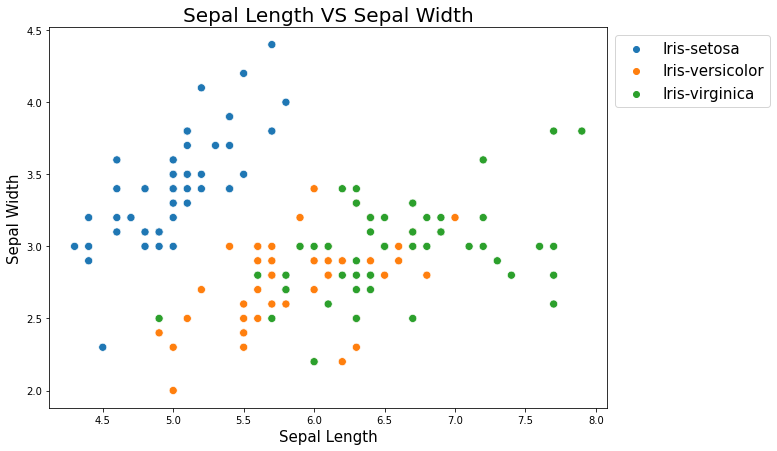

In [21]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Sepal Length VS Sepal Width', fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

We can observe that Iris-setosa has a relatively lower sepal length (as compared to versicolor or virginica). Iris-setosa has a large sepal width. It is hard to distinguish between versicolor and virginica based on sepal length and width. 

## II.3 Multivariate Analysis
It refers to an analysis involving multiple dependent variables resulting in one outcome. Creating different graphs for all the features to perform bivariate analysis would be extremely tedious. Seaborn provides a convenient way to perform multivariate analysis using the `pairplot` function.

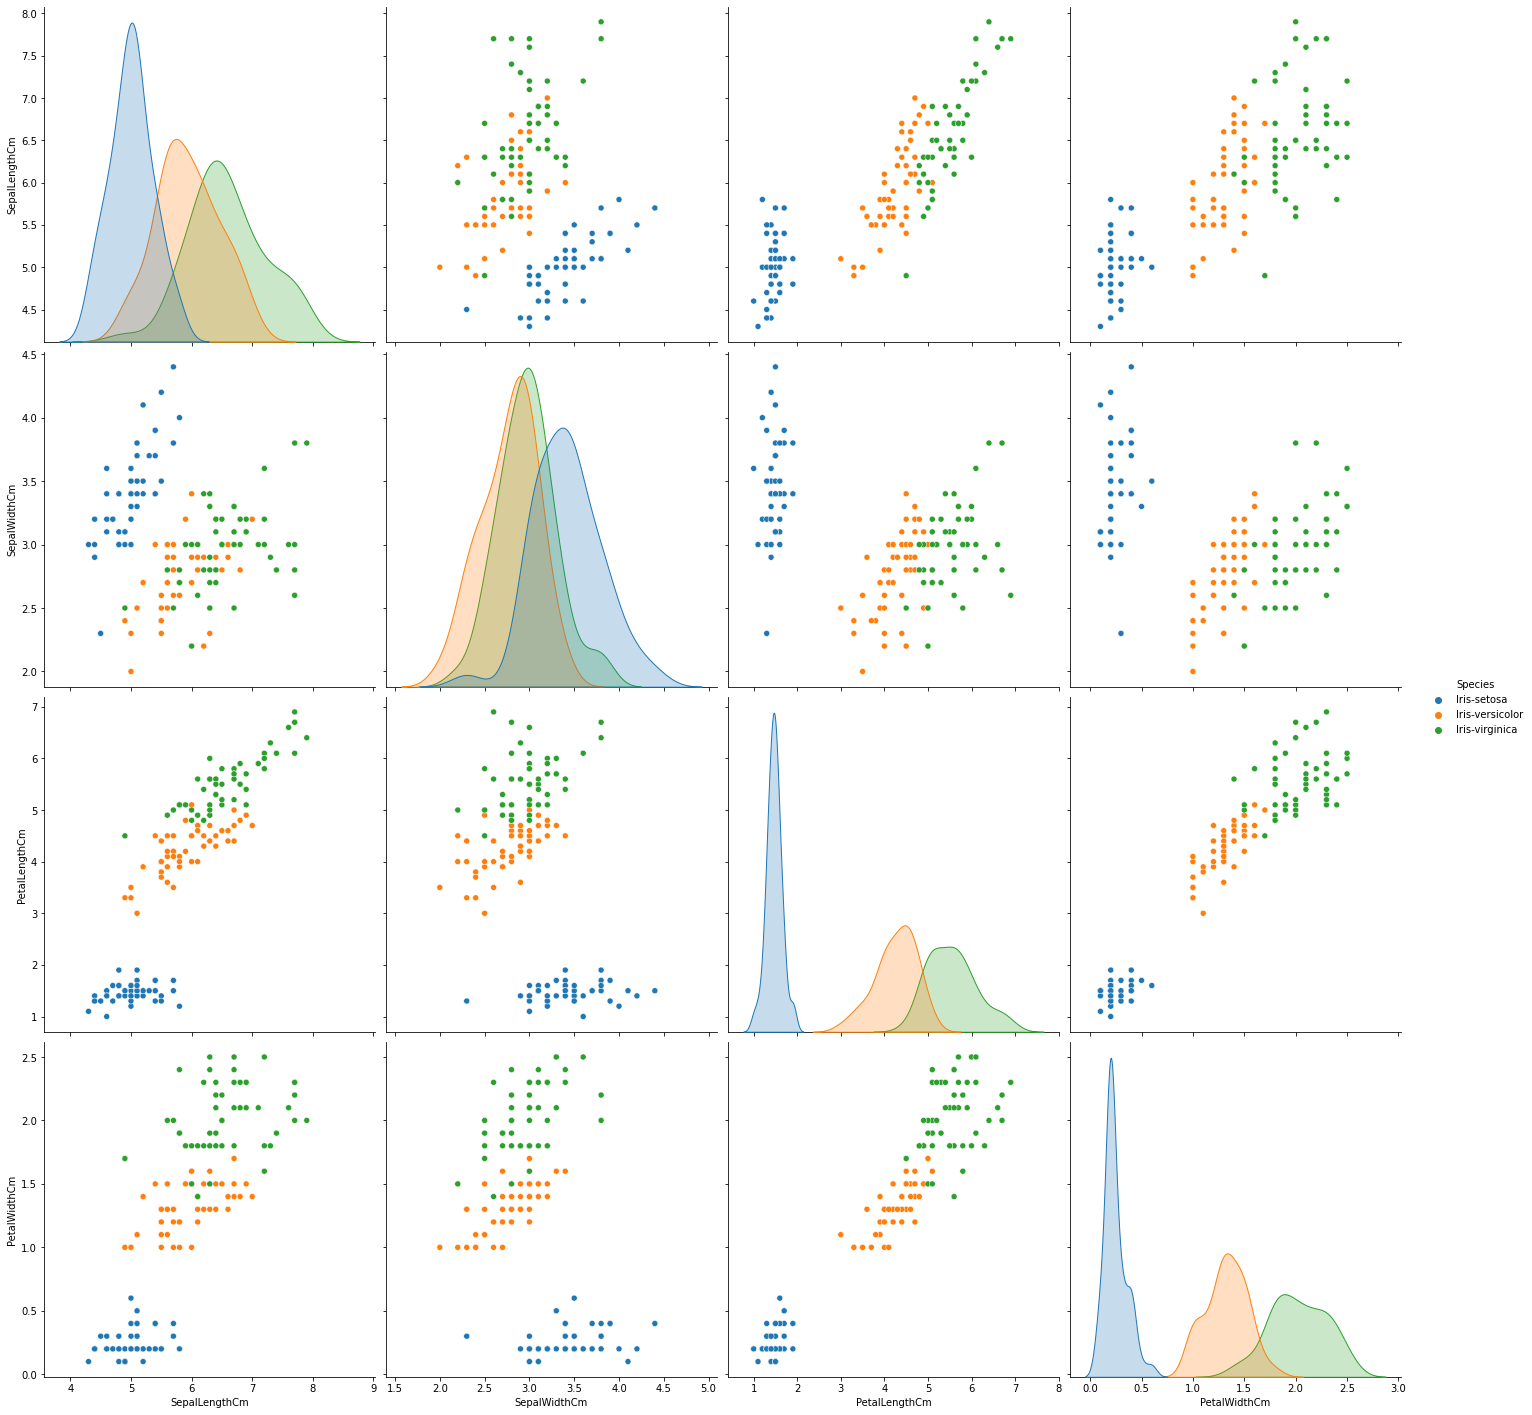

In [22]:
sns.pairplot(df, hue='Species', height=5)
plt.show()

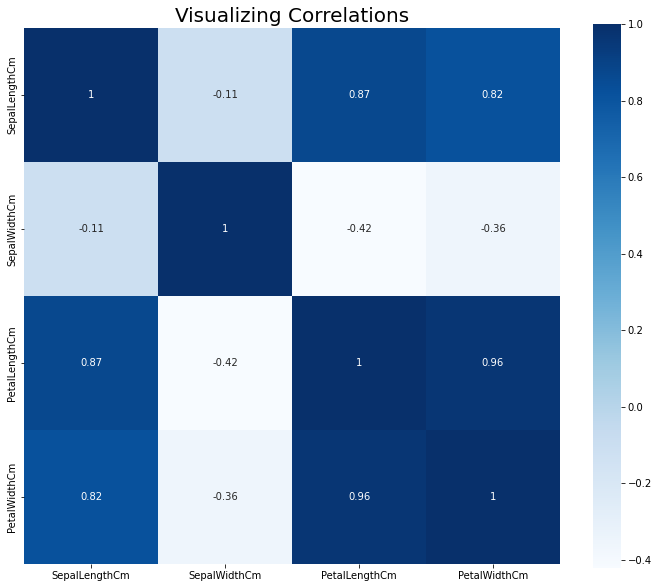

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='Blues', square=True, annot=True)
plt.title("Visualizing Correlations", size=20)

plt.show()

# III. Data preparation

In [50]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=0)

# IV. Modeling 

In [58]:
def generate_results(model, predictions, name):
    
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep="\n")
    cm_model = confusion_matrix(y_test, predictions)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_model,
                annot=True,
                cmap='Blues',
                annot_kws={'size': 15},
                square=True)
    plt.title('Confusion Matrix for ' + name, size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

## IV.1 Logistic Regression
Logistic regression, despite its name, is a classification model rather than regression model. It is a process of modeling the probability of a discrete outcome given input variables. 

The accuracy for Logistic Regression is: 96.66666666666667 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



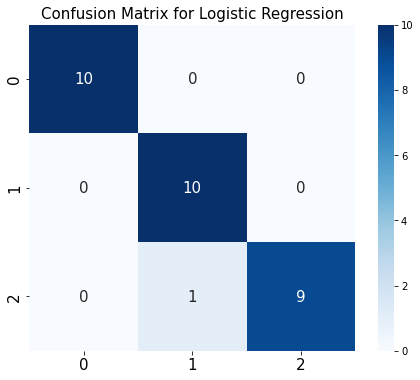

In [59]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)

print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
generate_results(lr, y_pred, 'Logistic Regression')

## IV.2 KNN
### IV.2.a KNN prediction

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)

print("The accuracy for KNN is:", acc_knn * 100, "%")

The accuracy for KNN is: 96.66666666666667 %


## IV.2 KNN
### IV.2.a KNN model performance

On the default KNN model we are getting a score of 96.67%. The default value for `n_neighbors` is 5 in KNN. Lets look at the score for different values of `n_neighbors` and select the value that gives us the best results.

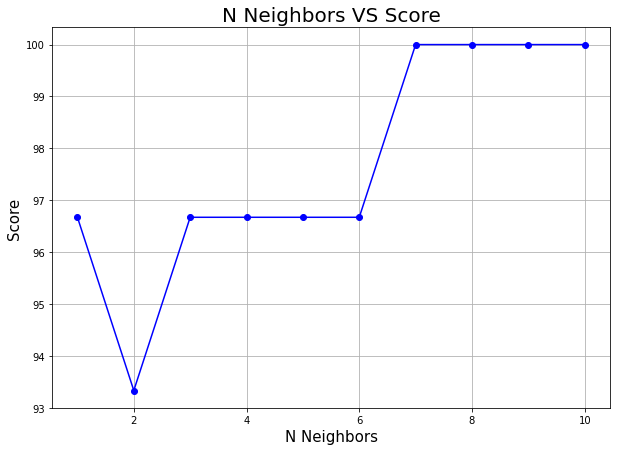

In [32]:
store_acc = []
neighbors = [i for i in range(1, 11)]

for i in range(len(neighbors)):
    knn_improved = KNeighborsClassifier(n_neighbors=neighbors[i])
    knn_improved.fit(X_train, y_train)
    y_pred = knn_improved.predict(X_test)
    acc_knn_for_diff_values = round(
        (knn_improved.score(X_test, y_test)) * 100,
        2)
    store_acc.append(acc_knn_for_diff_values)

plt.figure(figsize=(10, 7))
plt.plot(neighbors, store_acc, color='blue', marker='o')
plt.title('N Neighbors VS Score', fontsize=20)
plt.xlabel('N Neighbors', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.grid(True)
plt.show()

From the graph above we can clearly observe that for all values of `n_neighbors` above 6, the accuracy is a 100%. Lets select the smallest value of `n_neighbors` that gives us the highest accuracy which is 7.

### IV.2.c KNN improvement

The accuracy for KNN is: 100.0 %

The classification report for KNN (n_neighbors = 7) is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



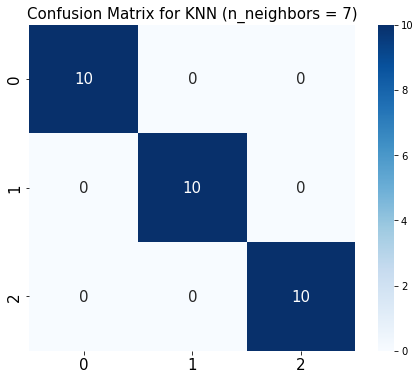

In [33]:
knn_improved = KNeighborsClassifier(n_neighbors=7)
knn_improved.fit(X_train, y_train)
y_pred = knn_improved.predict(X_test)
acc_knn_imp = knn_improved.score(X_test, y_test)

print("The accuracy for KNN is:", acc_knn_imp * 100, "%")
generate_results(knn_improved, y_pred, 'KNN (n_neighbors = 7)')

## IV.3 Gaussian Naive Bayes

This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

The accuracy for Gaussian Naive Bayes is: 96.66666666666667 %

The classification report for Gaussian Naive Bayes is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



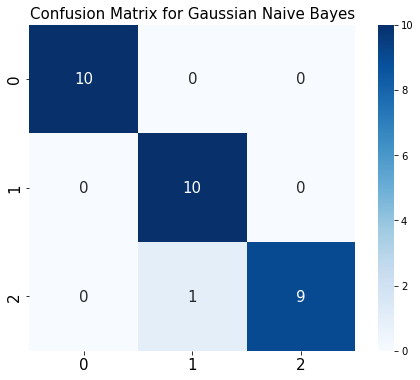

In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = gnb.score(X_test, y_test)

print('The accuracy for Gaussian Naive Bayes is:', acc_gnb * 100, '%')
generate_results(gnb, y_pred, 'Gaussian Naive Bayes')

## IV.4 Support Vector Classifier

It is a supervised classification algorithm. The idea of SVM is simple. It creates a line or a hyperplane which separates the data into classes.

The accuracy for SVC is: 100.0 %

The classification report for Support Vector Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



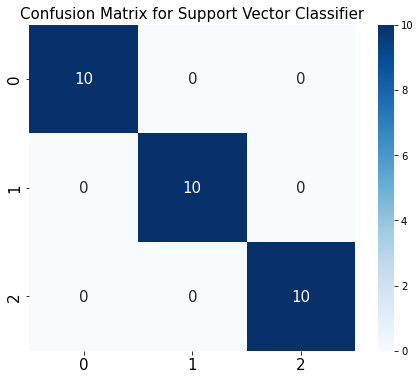

In [36]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)

print('The accuracy for SVC is:', acc_svc * 100, '%')
generate_results(svc, y_pred, 'Support Vector Classifier')

## IV.5 Decision Tree Classifier

A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

The accuracy of the Decision Tree Classifier is: 96.66666666666667 %

The classification report for Decision Tree Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



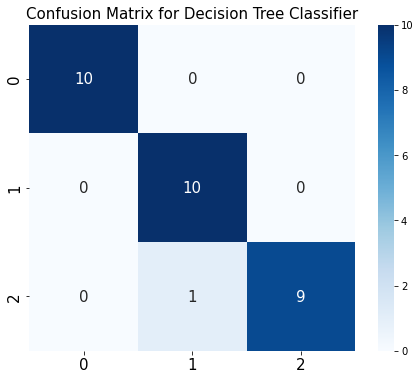

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)

print('The accuracy of the Decision Tree Classifier is:', acc_dtc * 100, '%')
generate_results(dtc, y_pred, 'Decision Tree Classifier')

## IV.6 Random Forest Classifier

The term “Random Forest Classifier” refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.

The accuracy of the Random Forest Classifier is: 93.33333333333333 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



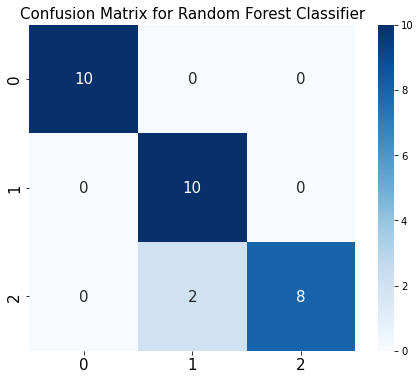

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)

print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

## IV.7 Ada Boost Classifier
It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

The accuracy for Ada Boost Classifier is: 93.33333333333333 %

The classification report for Ada Boost Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



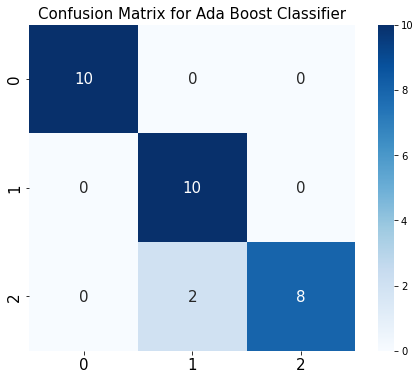

In [40]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc_abc = abc.score(X_test, y_test)

print('The accuracy for Ada Boost Classifier is:', acc_abc * 100, '%')
generate_results(abc, y_pred, 'Ada Boost Classifier')

## IV.8 Extra Trees Classifier
This is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

The accuracy for Etra Trees Classifier is: 100.0 %

The classification report for Extra Tress Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



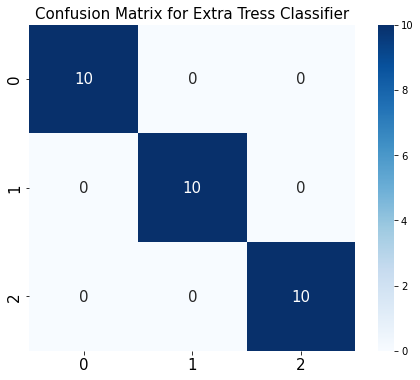

In [41]:
etc = ExtraTreesClassifier(random_state = 0)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)

print('The accuracy for Etra Trees Classifier is:', acc_etc * 100, '%')
generate_results(etc, y_pred, 'Extra Tress Classifier')

## IV.9 Bagging Classifier
Bagging classifier is an ensemble technique that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction.

The accuracy for Bagging Classifier is: 93.33333333333333 %

The classification report for Bagging Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



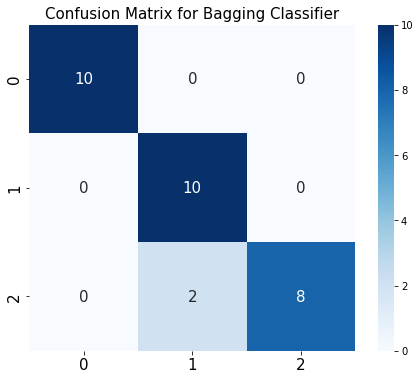

In [42]:
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_bc = bc.score(X_test, y_test)

print('The accuracy for Bagging Classifier is:', acc_bc * 100, '%')
generate_results(bc, y_pred, 'Bagging Classifier')

## IV.10 Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

The accuracy for the Gradient Boosting Classifier is: 96.66666666666667 %

The classification report for Gradient Boosting Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



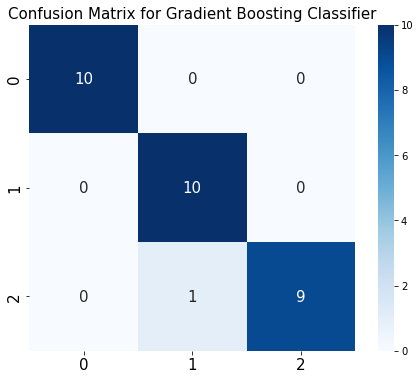

In [43]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print('The accuracy for the Gradient Boosting Classifier is:', acc_gbc * 100, '%')
generate_results(gbc, y_pred, 'Gradient Boosting Classifier')

## IV.11 XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process.

The accuracy for XGB Classifier is: 93.33333333333333 %

The classification report for XGB Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



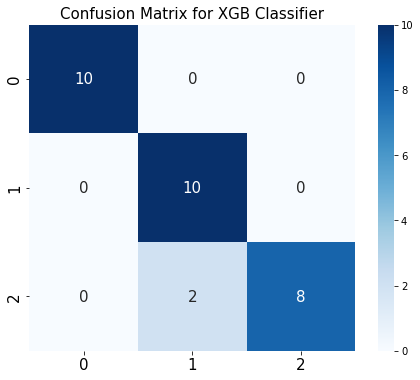

In [44]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print('The accuracy for XGB Classifier is:', acc_xgbc * 100, '%')
generate_results(xgbc, y_pred, 'XGB Classifier')

# V. Final Results

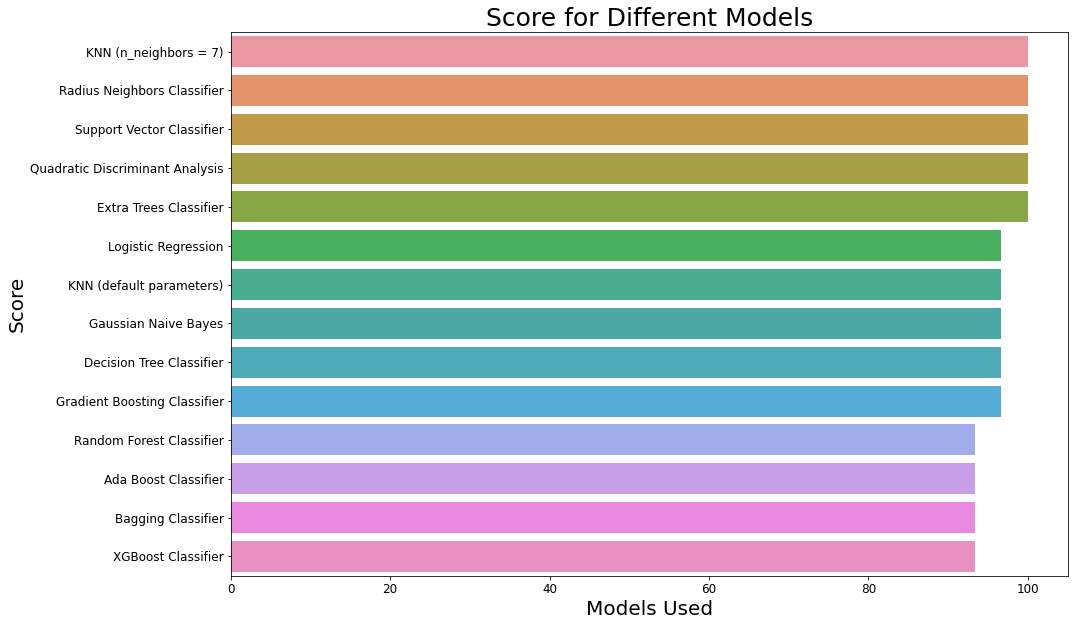

In [45]:
data = {'Logistic Regression': acc_lr * 100, 
        'KNN (default parameters)': acc_knn * 100, 
        'KNN (n_neighbors = 7)': acc_knn_imp * 100, 
        'Radius Neighbors Classifier': acc_rnc * 100, 
        'Gaussian Naive Bayes': acc_gnb * 100,
        'Support Vector Classifier': acc_svc * 100, 
        'Quadratic Discriminant Analysis': acc_qda * 100, 
        'Decision Tree Classifier': acc_dtc * 100, 
        'Random Forest Classifier': acc_rfc * 100,
        'Ada Boost Classifier': acc_abc * 100, 
        'Extra Trees Classifier': acc_etc * 100,
        'Bagging Classifier': acc_bc * 100, 
        'Gradient Boosting Classifier': acc_gbc * 100,
        'XGBoost Classifier': acc_xgbc * 100}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Models Used", size = 20)
plt.xticks(size = 12)
plt.ylabel("Score", size = 20)
plt.yticks(size = 12)
plt.title("Score for Different Models", size = 25)
plt.show()